In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/ai-developer-productivity-dataset/ai_dev_productivity.csv")

In [3]:
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5.015600,463.192000,2.976000,6.975800,4.60800,0.858000,1.510920,4.498200,0.606000
std,1.947253,142.334991,1.678409,1.455965,2.70499,1.102846,1.085557,1.868861,0.489124
min,0.000000,6.000000,0.000000,3.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,3.600000,369.500000,2.000000,6.100000,3.00000,0.000000,0.697500,3.175000,0.000000
50%,5.030000,500.500000,3.000000,6.950000,5.00000,0.000000,1.260000,4.400000,1.000000
75%,6.275000,600.000000,4.000000,7.900000,6.00000,2.000000,2.070000,5.800000,1.000000
max,12.000000,600.000000,8.000000,10.000000,13.00000,5.000000,6.360000,10.000000,1.000000


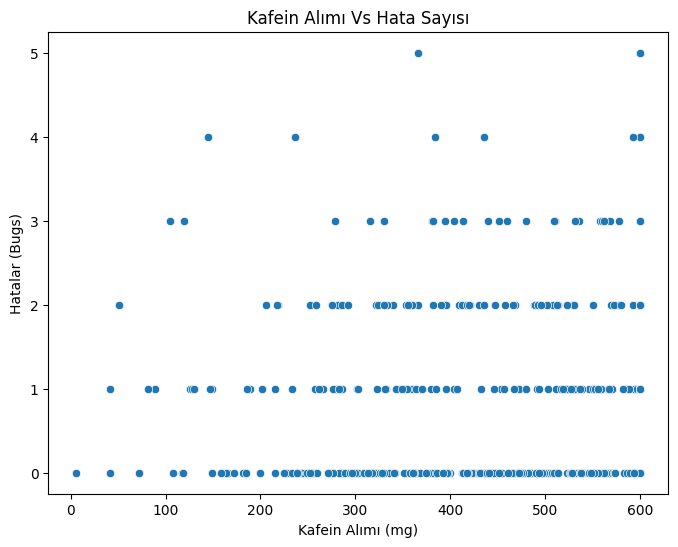

In [4]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='coffee_intake_mg', y='bugs_reported', data=data)
plt.title('Kafein Alımı Vs Hata Sayısı')
plt.xlabel('Kafein Alımı (mg)')
plt.ylabel('Hatalar (Bugs)')
plt.show()

In [5]:
#korelasyon hesaplama
korelasyon= data['coffee_intake_mg'].corr(data['bugs_reported'])
print(f"Kafein alımı ile hata sayısı arasındaki korelasyon: {korelasyon}")

Kafein alımı ile hata sayısı arasındaki korelasyon: 0.04626122475964644


In [6]:
#kafein alımı kategorilere ayırma
data['coffee_kategori'] = pd.cut(data['coffee_intake_mg'], bins=[0, 200, 400, 600], labels=['Düşük', 'Orta', 'Yüksek'])
print(data.coffee_kategori)

0      Yüksek
1      Yüksek
2      Yüksek
3      Yüksek
4      Yüksek
        ...  
495    Yüksek
496      Orta
497    Yüksek
498      Orta
499      Orta
Name: coffee_kategori, Length: 500, dtype: category
Categories (3, object): ['Düşük' < 'Orta' < 'Yüksek']


In [7]:
#kafein kategorierine göre ortalama hata sayısı
coffee_bugs= data.groupby('coffee_kategori')['bugs_reported'].mean()
print("\nKafein kategorilerine göre ortalama hata sayısı:")
print(coffee_bugs)


Kafein kategorilerine göre ortalama hata sayısı:
coffee_kategori
Düşük     0.741935
Orta      0.842975
Yüksek    0.873563
Name: bugs_reported, dtype: float64


/tmp/ipykernel_13/536599236.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  coffee_bugs= data.groupby('coffee_kategori')['bugs_reported'].mean()


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


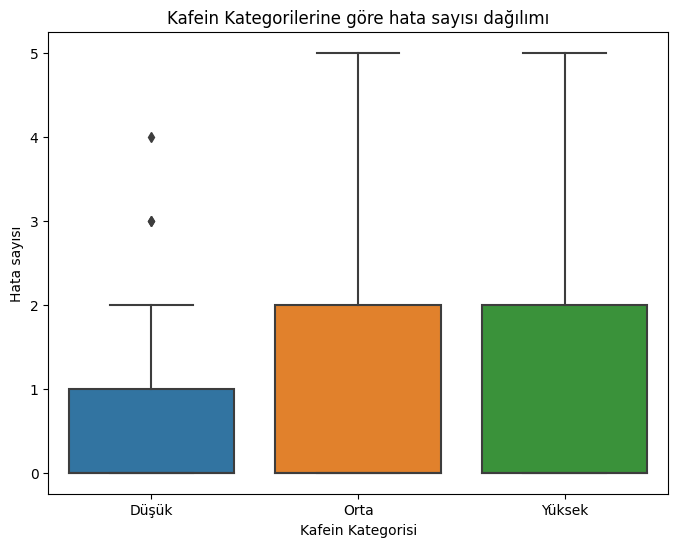

In [8]:
#kafein kategorilerine göre hata sayısı grafiği
plt.figure(figsize=(8,6))
sns.boxplot(x='coffee_kategori', y='bugs_reported', data=data)
plt.title('Kafein Kategorilerine göre hata sayısı dağılımı')
plt.xlabel('Kafein Kategorisi')
plt.ylabel('Hata sayısı')
plt.show()

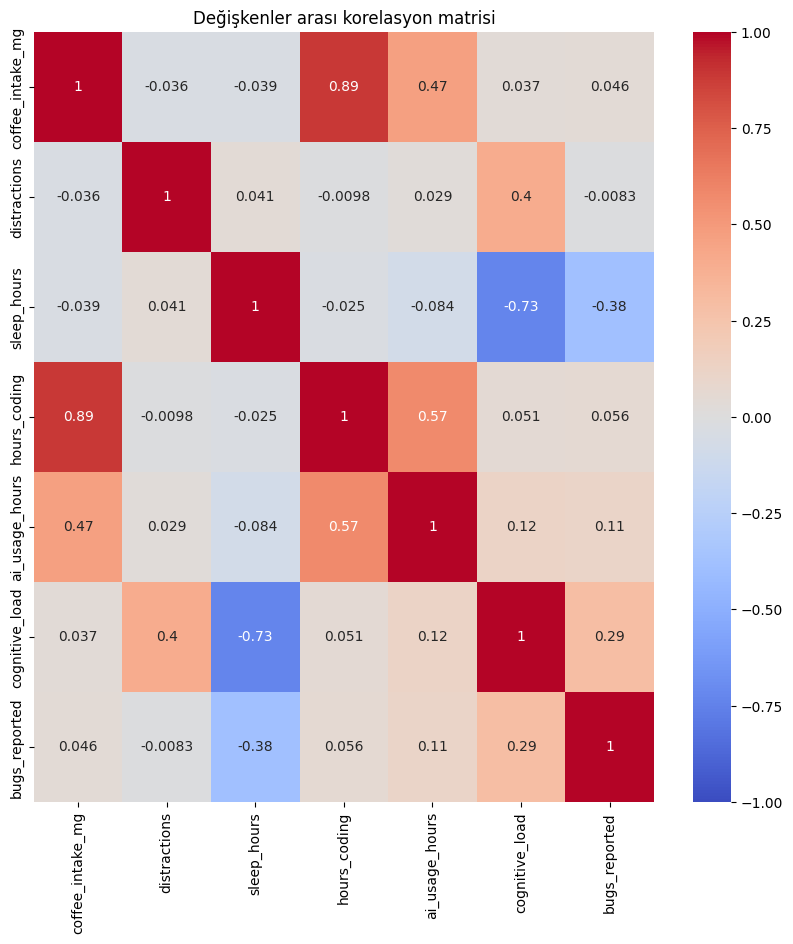

Hatalar ve diğer değişkenlerin korelasyonu: 
coffee_intake_mg    0.046261
distractions       -0.008341
sleep_hours        -0.384424
hours_coding        0.055979
ai_usage_hours      0.113885
cognitive_load      0.292640
bugs_reported       1.000000
Name: bugs_reported, dtype: float64


In [9]:
#korelasyon matrisi
corr_matrix= data[['coffee_intake_mg', 'distractions', 'sleep_hours', 'hours_coding', 'ai_usage_hours', 'cognitive_load', 'bugs_reported']].corr()

#korelasyon görselleştirme
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Değişkenler arası korelasyon matrisi')
plt.show()

#hata ve diğer değişkenlerin korelasyonu
print('Hatalar ve diğer değişkenlerin korelasyonu: ')
print(corr_matrix['bugs_reported'])

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
data = pd.read_csv('/kaggle/input/ai-developer-productivity-dataset/ai_dev_productivity.csv')

In [12]:
#özellikler ve hedef
X = data[['coffee_intake_mg', 'sleep_hours', 'cognitive_load', 'hours_coding', 'ai_usage_hours', 'distractions']]
y = data['bugs_reported']

In [13]:
#veriyi ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modeli eğit
model= RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

#Tahmin
y_pred = model.predict(X_test)

In [14]:
#Performans
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")

#özellik önem dereceleri
print("\nÖzellik önem dereceleri:")
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f"{feature}: {importance}")

MSE: 1.2701740000000001
R2: -0.09394022909310129

Özellik önem dereceleri:
coffee_intake_mg: 0.10104622858825031
sleep_hours: 0.3115165944519923
cognitive_load: 0.142947759054864
hours_coding: 0.15577336464754354
ai_usage_hours: 0.2207321151176821
distractions: 0.06798393813966776


### XGBoost denemesi

In [15]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# Özellikler ve hedef
X = data[['coffee_intake_mg', 'sleep_hours', 'cognitive_load', 'hours_coding', 'ai_usage_hours', 'distractions']]
y = data['bugs_reported']

# Veriyi ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğit
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

In [17]:
# Performans
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}")

# Özellik önem dereceleri
print("\nÖzellik önem dereceleri:")
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f"{feature}: {importance}")

MSE: 1.660968667092977
R²: -0.4305130196305027

Özellik önem dereceleri:
coffee_intake_mg: 0.08935320377349854
sleep_hours: 0.2901898920536041
cognitive_load: 0.14481568336486816
hours_coding: 0.14597643911838531
ai_usage_hours: 0.19773083925247192
distractions: 0.13193389773368835


### Veri ölçeklendirme

In [18]:
# Özellikler ve hedef
X = data[['coffee_intake_mg', 'sleep_hours', 'cognitive_load', 'hours_coding', 'ai_usage_hours', 'distractions']]
y = data['bugs_reported']

# Veriyi ölçeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veriyi ayır
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modeli eğit
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

In [19]:
# Performans
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}")

# Özellik önem dereceleri
print("\nÖzellik önem dereceleri:")
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f"{feature}: {importance}")

MSE: 1.660968667092977
R²: -0.4305130196305027

Özellik önem dereceleri:
coffee_intake_mg: 0.08935320377349854
sleep_hours: 0.2901898920536041
cognitive_load: 0.14481568336486816
hours_coding: 0.14597643911838531
ai_usage_hours: 0.19773083925247192
distractions: 0.13193389773368835


### Aykırı değerleri kontrol etme

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


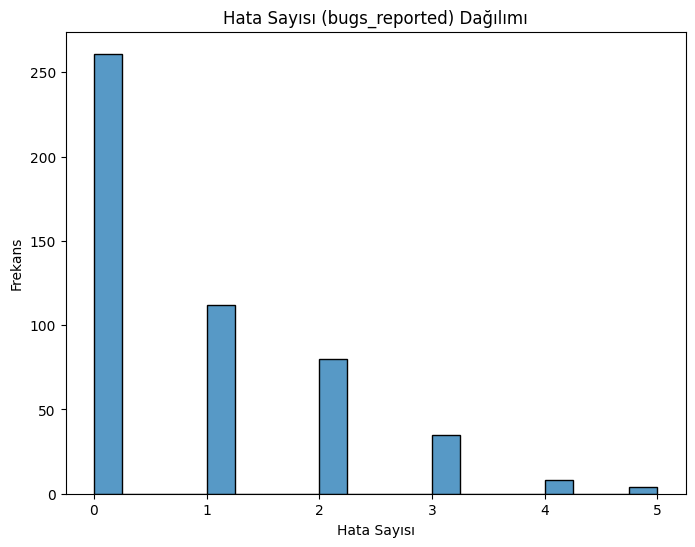

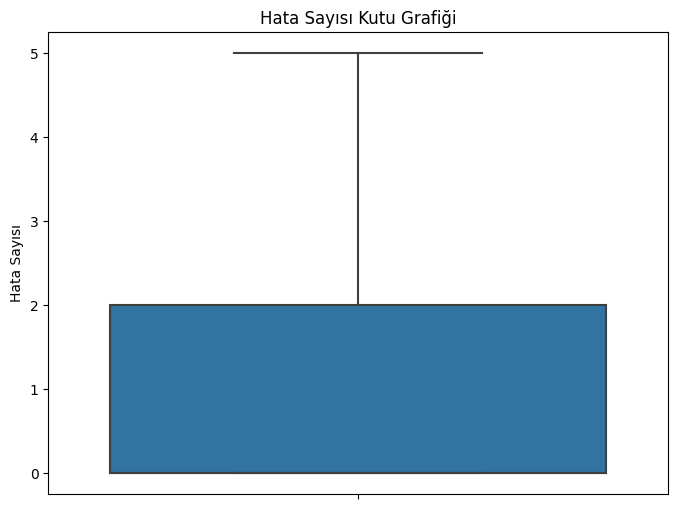

Aykırı değer sayısı: 0
Empty DataFrame
Columns: [coffee_intake_mg, sleep_hours, cognitive_load, bugs_reported]
Index: []


In [21]:
# bugs_reported dağılımı
plt.figure(figsize=(8, 6))
sns.histplot(data['bugs_reported'], bins=20)
plt.title('Hata Sayısı (bugs_reported) Dağılımı')
plt.xlabel('Hata Sayısı')
plt.ylabel('Frekans')
plt.show()

# Aykırı değerler için kutu grafiği
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['bugs_reported'])
plt.title('Hata Sayısı Kutu Grafiği')
plt.ylabel('Hata Sayısı')
plt.show()

# Aykırı değerleri tespit (IQR yöntemi)
Q1 = data['bugs_reported'].quantile(0.25)
Q3 = data['bugs_reported'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['bugs_reported'] < Q1 - 1.5 * IQR) | (data['bugs_reported'] > Q3 + 1.5 * IQR)]
print(f"Aykırı değer sayısı: {len(outliers)}")
print(outliers[['coffee_intake_mg', 'sleep_hours', 'cognitive_load', 'bugs_reported']])

In [22]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# bugs_reported değerlerinin dağılımı
print("bugs_reported değerlerinin frekansı:")
print(data['bugs_reported'].value_counts())

# Özellikler ve hedef
X = data[['coffee_intake_mg', 'sleep_hours', 'cognitive_load', 'hours_coding', 'ai_usage_hours', 'distractions']]
y = data['bugs_reported']

# Veriyi ölçeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veriyi ayır
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# SVR modelini eğit
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Performans
print(f"\nMSE: {mean_squared_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}")

bugs_reported değerlerinin frekansı:
bugs_reported
0    261
1    112
2     80
3     35
4      8
5      4
Name: count, dtype: int64

MSE: 1.2482962943420004
R²: -0.07509800563431246


### İkili sınıflandırma denemesi

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [25]:
# bugs_reported'ı ikili yap: 0 (hata yok), 1 (hata var)
data['has_bug'] = data['bugs_reported'].apply(lambda x: 1 if x > 0 else 0)

# Özellikler ve hedef
X = data[['coffee_intake_mg', 'sleep_hours', 'cognitive_load', 'hours_coding', 'ai_usage_hours', 'distractions']]
y = data['has_bug']

# Veriyi ölçeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veriyi ayır
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Rastgele Orman sınıflandırma modeli
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Performans
print(f"Doğruluk: {accuracy_score(y_test, y_pred)}")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

# Özellik önem dereceleri
print("\nÖzellik önem dereceleri:")
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f"{feature}: {importance}")

Doğruluk: 0.59

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.63      0.57      0.60        54
           1       0.55      0.61      0.58        46

    accuracy                           0.59       100
   macro avg       0.59      0.59      0.59       100
weighted avg       0.59      0.59      0.59       100


Özellik önem dereceleri:
coffee_intake_mg: 0.13423281612657342
sleep_hours: 0.24849591372709895
cognitive_load: 0.17836646073550677
hours_coding: 0.16718082465255485
ai_usage_hours: 0.18909590690332695
distractions: 0.08262807785493913


### Logistic Regresyon denemesi 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [27]:
# Yeni özellik: coffee_per_sleep
data['coffee_per_sleep'] = data['coffee_intake_mg'] / data['sleep_hours']

# bugs_reported'ı ikili yap
data['has_bug'] = data['bugs_reported'].apply(lambda x: 1 if x > 0 else 0)

# Özellikler ve hedef
X = data[['coffee_intake_mg', 'sleep_hours', 'cognitive_load', 'hours_coding', 'ai_usage_hours', 'distractions', 'coffee_per_sleep']]
y = data['has_bug']

# Veriyi ölçeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veriyi ayır
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Lojistik Regresyon modeli
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Performans
print(f"Doğruluk: {accuracy_score(y_test, y_pred)}")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

# Özellik katsayıları
print("\nÖzellik katsayıları:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef}")

Doğruluk: 0.57

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.61      0.57      0.59        54
           1       0.53      0.57      0.55        46

    accuracy                           0.57       100
   macro avg       0.57      0.57      0.57       100
weighted avg       0.57      0.57      0.57       100


Özellik katsayıları:
coffee_intake_mg: -0.34040039309345355
sleep_hours: -0.5610700504803717
cognitive_load: 0.03948469267204935
hours_coding: -0.139886693466667
ai_usage_hours: 0.37694179935231426
distractions: -0.07372617109118602
coffee_per_sleep: 0.47054600295619237


# 🧠 AI Developer Productivity Dataset Analysis  
**Dataset Exploration & Machine Learning Experiments**

---

## 🎯 Objective

This study explores the impact of caffeine intake (`coffee_intake_mg`) on coding errors (`bugs_reported`) using the AI Developer Productivity dataset. We also evaluate other influencing factors such as sleep duration, distractions, and cognitive load, and perform machine learning experiments to predict the number of bugs.

---

## 📋 Dataset Overview

- **Size:** 500 rows, 9 columns  
- **Target Variable:** `bugs_reported` (range: 0–5, 52% are zero)
- **Features:**
  - `hours_coding`
  - `coffee_intake_mg`
  - `distractions`
  - `sleep_hours`
  - `commits`
  - `ai_usage_hours`
  - `cognitive_load`
  - `task_success`

---

## 🔍 Exploratory Data Analysis (EDA)

### 🔗 Correlations

| Feature             | Correlation | Insight                          |
|---------------------|-------------|----------------------------------|
| `sleep_hours`       | **-0.38**   | More sleep → fewer bugs         |
| `cognitive_load`    | **0.29**    | Higher load → more bugs         |
| `coffee_intake_mg`  | **0.046**   | Very weak positive correlation  |
| `ai_usage_hours`, `hours_coding`, `distractions` | < 0.15 | Weak correlations |

### ☕ Caffeine Categories

| Category         | Avg. Bugs |
|------------------|-----------|
| Low (<200 mg)    | 0.74      |
| Medium (200–400) | 0.84      |
| High (>400 mg)   | 0.87      |

> Slight increase in bugs with higher caffeine levels.

### ⚠️ Bug Distribution

- 52% of `bugs_reported` values are **zero**, which makes learning more difficult for models.

---

## 🤖 Machine Learning Experiments

### 🔧 Regression Models

| Model                    | MSE   | R²     | Comment           |
|--------------------------|-------|--------|-------------------|
| Linear Regression        | 1.27  | -0.09  | Poor performance  |
| Random Forest Regressor  | 1.27  | -0.09  | Weak performance  |
| XGBoost Regressor        | 1.66  | -0.43  | Failed even after scaling |
| Support Vector Regressor | 1.25  | -0.08  | Slightly better   |

### 🔁 Classification (Logistic Regression)

- Converted `bugs_reported` into binary `has_bug` (0: no bug, 1: bug reported)
- Added feature: `coffee_per_sleep = coffee_intake_mg / sleep_hours`
- **Accuracy:** 0.57  
- **F1-scores:** ~0.55–0.59

#### 🔍 Top Features (by coefficient impact):
- `sleep_hours`: -0.56  
- `coffee_per_sleep`: 0.47  
- `ai_usage_hours`: 0.38  

---

## 📌 Key Findings

- **Caffeine intake** has **very weak correlation** with coding errors.
- **Sleep hours** significantly reduce errors and are the most important predictor.
- **AI usage hours** and **coffee-to-sleep ratio** may increase bug occurrence.
- Regression models failed to explain the data (negative R²).
- Logistic regression performed slightly better for binary classification.

---

## ⚠️ Limitations

- 52% of target values are zero, leading to imbalance in regression and classification.
- Weak feature-target relationships limit model performance.
- Dataset lacks important factors like project complexity, developer experience, and team size.

---

## ✅ Conclusion

There is **no significant evidence** that caffeine intake affects bug count.  
Sleep duration and AI usage appear more influential.  
More complete datasets with additional context (project type, experience level) are required for deeper insights and better predictive modeling.

---

> 📁 Dataset Source: [AI Developer Productivity Dataset on Kaggle](https://www.kaggle.com/datasets/atharvasoundankar/ai-developer-productivity-dataset)
